In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import quantum as qm
import asymmetric as asym
import glob
import scipy.linalg as la
import seaborn as sns

In [3]:
colors = ["aqua", "red"]
sns.set_palette(sns.xkcd_palette(colors)+sns.color_palette("Set1", 9))

In [14]:
# Setup #
L = 8
dense = True
pert = True
if (dense): 
    fix = 'dense'
    prefix = 'data/otoc_dense'
else: 
    fix = 'sparse'
    prefix = 'data/otoc_sparse'
if (pert): 
    prefix = prefix + "_pert_"
    fix    = fix    + "_pert_"
sites = np.arange(L)
# print(prefix + "foreL" + str(L) + "v*.npy")
forenames = glob.glob(prefix + "foreL" + str(L) + "v*.npy")
backnames = glob.glob(prefix + "backL" + str(L) + "v*.npy")

In [15]:
# Load Data #
otocsfore = []
otocsback = []
vs        = []
vsback    = []
for fname in forenames:
    otocsfore.append(np.load(fname))
    vs.append(    int(fname.replace(prefix + "foreL" + str(L) + "v", "").replace(".npy", "")))
for fname in backnames:
    otocsback.append(np.load(fname)[::-1])
    vsback.append(int(fname.replace(prefix + "backL" + str(L) + "v", "").replace(".npy", "")))
vs        = np.array(vs)
otocsfore = np.array(otocsfore)
otocsback = np.array(otocsback)
args      = np.argsort(vs)
vs        = vs[args]
otocsfore = otocsfore[args]
otocsback = otocsback[np.argsort(vsback)]

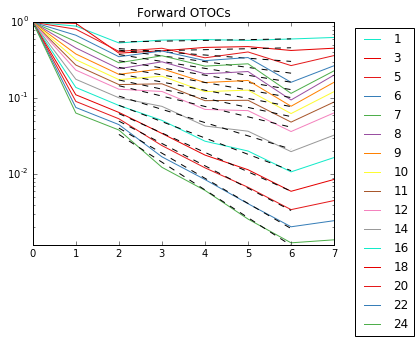

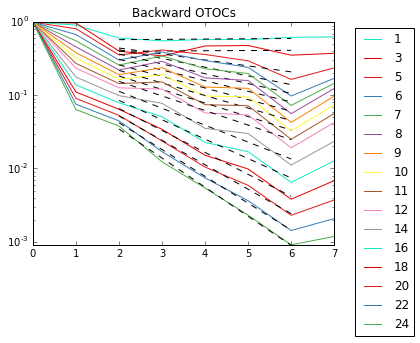

In [10]:
# Forward
ax = plt.subplot(111)
gammas_fore = []
for idx, otocfore in enumerate(otocsfore):
    ax.semilogy(sites[::], otocfore[::], label = str(vs[idx]))
    x = sites[2:7:]
    y = otocfore[2:7:]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_fore.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Forward OTOCs")
# plt.savefig('figures/otocs_' + fix + 'foreevenL' + str(L) + '.pdf')
plt.show()

# Forward
ax = plt.subplot(111)
gammas_back = []
for idx, otocback in enumerate(otocsback):
    ax.semilogy(sites[::], otocback[::], label = str(vs[idx]))
    x = sites[2:7:]
    y = otocback[2:7:]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_back.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Backward OTOCs")
# plt.savefig('figures/otocs_' + fix + 'foreevenL' + str(L) + '.pdf')
plt.show()

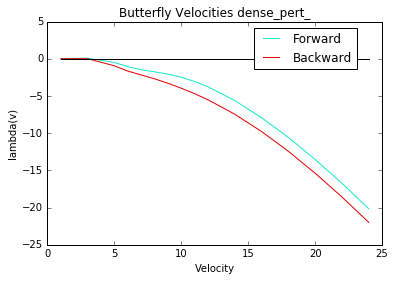

In [11]:
ax = plt.subplot(111)
ax.plot(vs, gammas_fore,  label = "Forward")
ax.plot(vs, gammas_back,  label = "Backward")
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(bbox_to_anchor=(.6, 1), loc=2)
plt.title("Butterfly Velocities " + fix)
plt.xlabel("Velocity")
plt.ylabel("lambda(v)")
# plt.savefig('figures/butterfly_' + fix + 'L' + str(L) + '.pdf')
plt.show()

In [18]:
np.shape(otocsfore[1])

(1, 8)